# **Tutorial NMMA - Nulcear-physics and multi-messenger astrophysics framework**

*related publication:*

https://arxiv.org/abs/2205.08513 

*online tutorials:*

https://nuclear-multimessenger-astronomy.github.io/nmma/index.html 

https://enlil.gw.physik.uni-potsdam.de/dokuwiki/doku.php?id=nmma

#**Introduction**

**What is it?**

NMMA is a Bayesian multi-messenger pipeline:
- targeting joint analyses of gravitational-wave and electromagnetic data
- is capable of statistical sampling using a variety of samplers, and
- incorporates sampling on equation of states (EOS)

**Overview on some functionalities:**

1) Light curve generation / fitting <br>
2) Bayesian inference <br>
1.   Gravitational-wave inference
2.   Electromagnetic signal inference
3.   Joint multi-messenger inference
4.   Real multi-messenger data vs. injection-based parameter estimation

3) Estimating properties of binary systems (Binary Neutron stars (BNS), Neutron-star-Black-holes (NSBH))<br>
4) Estimating the Hubble Constant $H_0$ <br>
5) ... and more

**Implemented models**

NMMA can analyze observational data but also mock-up data for different **astrophysical sources** such as:
- Gravitational waves (GWs)
- Kilonovae 
- Gamma-ray bursts (GRBs)
- Supernovae

These analyses are based on different models that are implemented in NMMA. 

#**1) Installation**

### **1.1) Google Colab - Jupyter notebook**

For an online installation in Google colab, please run 

In [11]:
!pip install imgaug==0.2.6
!pip install nmma==0.0.17
#!pip install tensorflow
#!git clone https://github.com/nuclear-multimessenger-astronomy/nmma.git

import numpy as np

     |████████████████████████████████| 7.0 MB 8.9 MB/s eta 0:00:01


  Created wheel for nmma: filename=nmma-0.0.17-py3-none-any.whl size=1574545 sha256=a0ece14156cb1941c3070681fcd8c7c59a93e8c7266148ff3374474b05c4e1a0
  Stored in directory: /Users/mcoughlin/Library/Caches/pip/wheels/ab/7a/eb/2c089cec3bf72335a649326f9e64b34f335e520dec95c47dbc
Successfully built nmma
  Attempting uninstall: nmma
    Found existing installation: nmma 0.0.13
    Uninstalling nmma-0.0.13:
      Successfully uninstalled nmma-0.0.13


### **1.2) local machines (PC, laptop) and larger clusters**


For an installation on a local machine, please follow this guideline or double-check with the online tutorials linked above!

1) Create and activate a virtual environment (here, e.g. with miniconda):
- `conda create --name nmma python=3.8`
- `conda activate nmma`

2) Clone nmma repository and install nmma along with other required packages:
- `git clone git@github.com:nuclear-multimessenger-astronomy/nmma.git`
- `cd nmma` into nmma directory and install it with `pip install .`
- `conda install mpi4py`
- `conda install -c conda-forge pymultinest`
- `conda install ipython`

3) Check if installation works by starting ipython and running:
- `import nmma`
- `import nmma.em.analysis`
- `import nmma.eos.create_injection`


***Note -*** some funcitonalities described in this tutorial will not be executbale in this online notebook. The reasons are that: <br>
- Bayesian inference is computationally expensive and requires simulation on many CPUs, and 
- some simulations need to read in several scripts in NMMA and the sourcing from different parent directories fails in the online installation, while the local installation runs smoothly!

***If you encounter*** the text passage 

*Run in terminal prompt*

than it means you should run this command with your local installation on your PC, laptop, or cluster!


# **2) Generating light curves**

NMMA enables to generate electromagnetic light curves in different electromagnetic regimes and for different astrophysical sources. The current version of NMMA includes different kilonova light curve models, enables to compute Gamma-ray burst afterglow light curves and can compute supernovae light curves. 

**a) Kilonovae**

These are optical counterparts to binary neutron star mergers generated by r-process material being produced. In this example, we use a POSSIS-based grid of kilonova models spanning the plausible binary neutron star parameter space (M. Bulla 2019). There are four parameters:

- the dynamical ejecta $M_{dyn}^{ej}$
- the wind ejecta $M_{wind}^{ej}$
- half opening angle $\phi$
- observation angle $θ_{obs}$

**Example - `Bu2019lm` model:** <br>

Let's generate a light curve in the parameter space similar to the astronomical transient AT2017gfo. <br> For this, we set a time array `t` for which the light curve needs to be generated, whereas `tmin`, `tmax` and `dt` are start time, end time and time step, respectively. We set up a dictionnary and specify the source parameters for which the light curve should be generated for!

In [1]:
# what is needed: 
import numpy as np
tmin = 0.1
tmax = 20.0
deltat = 0.1 
t = np.arange(tmin, tmax, deltat) # in days


params_range = {
  'log10_mej_dyn': -3,
  'log10_mej_wind': -3,
  'KNphi': 15,
  'inclination_EM': 0,
  'luminosity_distance': 40}

**Note that:**<br>

1) the parameters vary from model to model - an overview can be found [here](https://github.com/nuclear-multimessenger-astronomy/nmma/blob/2581c1e6806b066b42475824b260c68b9e4531ad/nmma/em/model.py#L16), <br>
2) some models such as `Bu2019lm` require to embed a SVD grid for light curve computation (see [nmma/svdmodels](https://github.com/nuclear-multimessenger-astronomy/nmma/tree/main/svdmodels)). <br>

With these, a light curve object can be instantiated as follows:

In [2]:
import nmma
from nmma.em.model import SVDLightCurveModel

lc_model = nmma.em.model.SVDLightCurveModel(model='Bu2019lm', sample_times = t, interpolation_type='tensorflow', svd_path = './svdmodels', mag_ncoeff=None,  lbol_ncoeff=None)


Install wrapt_timeout_decorator if you want timeout simulations.
Loaded filter ps1__y
Loaded filter sdssu
Loaded filter uvot__uvm2
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter bessellv
Loaded filter bessellb
Loaded filter uvot__uvw2
Loaded filter uvot__u
Loaded filter 2massj
Loaded filter atlaso
Loaded filter ztfg
Loaded filter bessellux
Loaded filter 2massh
Loaded filter besselli
Loaded filter uvot__white
Loaded filter atlasc
Loaded filter uvot__b
Loaded filter bessellr
Loaded filter ps1__r
Loaded filter ztfr
Loaded filter uvot__v
Loaded filter ztfi
Loaded filter uvot__uvw1
Loaded filter ps1__g
Loaded filter 2massks


We can now generate a light curve with the following command:

In [3]:
lbol, mag = lc_model.generate_lightcurve(t, params_range)
#mag

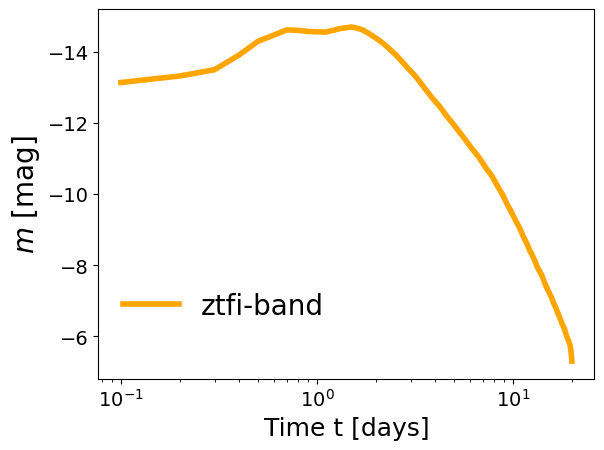

In [7]:
#!pip install matplotlib==3.1.1
import matplotlib.pyplot as plt

filt = 'ztfi'
plt.semilogx(t, mag['{0}'.format(filt)], label='{0}-band'.format(filt), color='orange', linewidth=4.0)
plt.ylim(np.max(mag['{0}'.format(filt)])+0.5, np.min(mag['{0}'.format(filt)])-0.5) 
    
# general plotting settings
plt.xlabel('Time t [days]', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('$m$ [mag]', fontsize=20)
plt.yticks(fontsize=14)
plt.legend(prop={"size":20}, frameon=False, bbox_to_anchor=(0., 0.2, 1., .102)) # loc=0,


**b) Gamma-ray burst afterglow**

NMMA uses `afterglowpy` (Ryan et al. 2020), an open-source computational tool modeling forward shock synchrotron emission from relativistic blast waves as a function of jet structure and viewing angle. The model parameters are:
- isotropic kinetic energy $E$
- jet collimation angle $θ_c$
- viewing angle $θ_w$
- circumburst constant density $n$
- spectral slope of the electron distribution $p$
- fraction of energy imparted to the electrons by the shock $ϵ_E$
- fraction of energy imparted to the magnetic field $ϵ_B$


In [8]:
from nmma.em.model import GRBLightCurveModel

t_day = np.arange(1., 950., 1.)
params = {
  'inclination_EM': 0.1,
  'log10_E0': 50.,
  'thetaCore': 0.05,
  'thetaWing': 0.01,
  'log10_n0':-4.5,
  'p':2.160,
  'log10_epsilon_e':-1.6, 
  'log10_epsilon_B':-2.,
  'luminosity_distance': 40,}

grb_model = nmma.em.model.GRBLightCurveModel(t_day, resolution=12, jetType=0) 

# note: this model does not require a SVD grid

In [9]:
lbol_grb, mag_grb = grb_model.generate_lightcurve(t_day, params)

***Tasks:*** <br>
1) Explore the GRB afterglow model:<br>
   i. In which photometric bands/filters is a light curve generated?<br>
   ii. Plot the light curve for the X-ray-1keV band!

In [13]:
mag_grb.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'K', 'U', 'B', 'V', 'R', 'I', 'radio-1.25GHz', 'radio-3GHz', 'radio-5.5GHz', 'radio-6GHz', 'X-ray-1keV', 'X-ray-5keV', 'bessellux', 'bessellb', 'bessellv', 'bessellr', 'besselli', 'standard::u', 'standard::b', 'standard::v', 'standard::r', 'standard::i', 'desu', 'desg', 'desr', 'desi', 'desz', 'desy', 'sdssu', 'sdssg', 'sdssr', 'sdssi', 'sdssz', 'f435w', 'f475w', 'f555w', 'f606w', 'f625w', 'f775w', 'f850lp', 'nicf110w', 'nicf160w', 'f098m', 'f105w', 'f110w', 'f125w', 'f127m', 'f139m', 'f140w', 'f153m', 'f160w', 'f218w', 'f225w', 'f275w', 'f300x', 'f336w', 'f350lp', 'f390w', 'f689m', 'f763m', 'f845m', 'f438w', 'uvf475w', 'uvf555w', 'uvf606w', 'uvf625w', 'uvf775w', 'uvf814w', 'uvf850lp', 'kepler', 'cspb', 'csphs', 'csphd', 'cspjs', 'cspjd', 'cspv3009', 'cspv3014', 'cspv9844', 'cspys', 'cspyd', 'cspg', 'cspi', 'cspk', 'cspr', 'cspu', 'f070w', 'f090w', 'f115w', 'f150w', 'f200w', 'f277w', 'f356w', 'f444w', 'f140m', 'f162m', 'f182m', 'f210m'

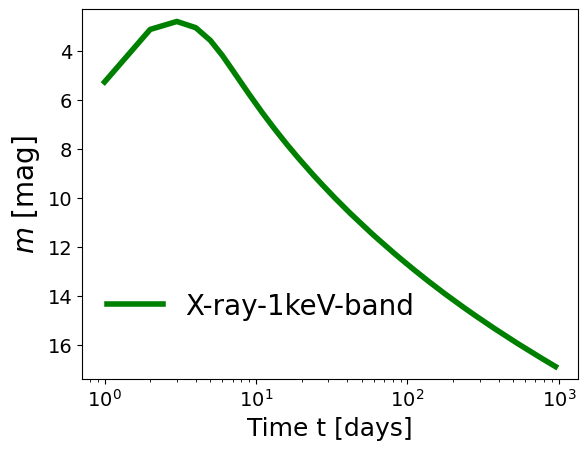

In [10]:
filt = 'X-ray-1keV'

plt.semilogx(t_day, mag_grb['{0}'.format(filt)], label='{0}-band'.format(filt), color='green', linewidth=4.0)
plt.ylim(np.max(mag_grb['{0}'.format(filt)])+0.5, np.min(mag_grb['{0}'.format(filt)])-0.5) 
    
# general plotting settings
plt.xlabel('Time t [days]', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('$m$ [mag]', fontsize=20)
plt.yticks(fontsize=14)
plt.legend(prop={"size":20}, frameon=False, bbox_to_anchor=(0., 0.2, 1., .102)) # loc=0,


**c) Supernovae**

NMMA incorporates several models to generate and fit supernova afterglow light curves relying on models from [sncosmo](https://github.com/sncosmo/sncosmo). For example, the nugent-hyper model [(Levan et al. 2005)](https://arxiv.org/abs/astro-ph/0403450) used for SN Ib/c supernovae with the stretch and scale set to match the intrinsic (dereddened, rest frame)-band luminosity of SN 1998bw at maximum light. The main free parameter is:
- the absolute magnitude $S_{max}$


In [15]:
tSN_min = 1 # days
tSN_max = 30 # days
tSN_dt = 0.1 # deltat
tSN = np.arange(tSN_min, tSN_max, tSN_dt)

params = {
  'supernova_mag_boost': 20, 
  'luminosity_distance': 40,}


SN_nugent = nmma.em.model.SupernovaLightCurveModel(tSN, model='nugent-hyper')

lbol_SN_nug, mag_SN_nug = SN_nugent.generate_lightcurve(tSN, params)

In [17]:
mag_SN_nug.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'K', 'U', 'B', 'V', 'R', 'I', 'radio-1.25GHz', 'radio-3GHz', 'radio-5.5GHz', 'radio-6GHz', 'X-ray-1keV', 'X-ray-5keV', 'bessellux', 'bessellb', 'bessellv', 'bessellr', 'besselli', 'standard::u', 'standard::b', 'standard::v', 'standard::r', 'standard::i', 'desu', 'desg', 'desr', 'desi', 'desz', 'desy', 'sdssu', 'sdssg', 'sdssr', 'sdssi', 'sdssz', 'f435w', 'f475w', 'f555w', 'f606w', 'f625w', 'f775w', 'f850lp', 'nicf110w', 'nicf160w', 'f098m', 'f105w', 'f110w', 'f125w', 'f127m', 'f139m', 'f140w', 'f153m', 'f160w', 'f218w', 'f225w', 'f275w', 'f300x', 'f336w', 'f350lp', 'f390w', 'f689m', 'f763m', 'f845m', 'f438w', 'uvf475w', 'uvf555w', 'uvf606w', 'uvf625w', 'uvf775w', 'uvf814w', 'uvf850lp', 'kepler', 'cspb', 'csphs', 'csphd', 'cspjs', 'cspjd', 'cspv3009', 'cspv3014', 'cspv9844', 'cspys', 'cspyd', 'cspg', 'cspi', 'cspk', 'cspr', 'cspu', 'f070w', 'f090w', 'f115w', 'f150w', 'f200w', 'f277w', 'f356w', 'f444w', 'f140m', 'f162m', 'f182m', 'f210m'

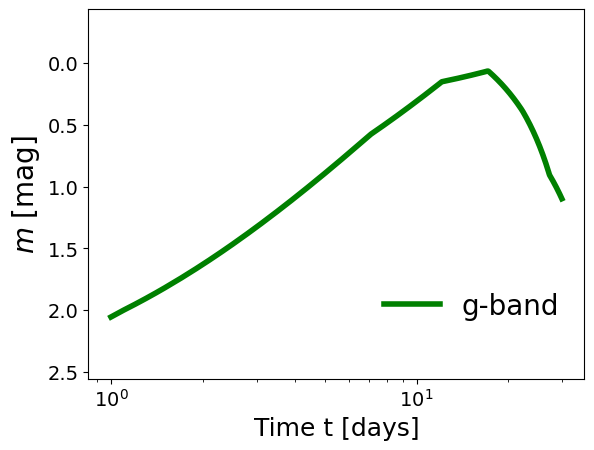

In [18]:
filt = 'g'
plt.semilogx(tSN,  mag_SN_nug['{0}'.format(filt)], label='{0}-band'.format(filt), color='green', linewidth=4.0)
plt.ylim(np.max(mag_SN_nug['{0}'.format(filt)])+0.5, np.min(mag_SN_nug['{0}'.format(filt)])-0.5) 
    
# general plotting settings
plt.xlabel('Time t [days]', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('$m$ [mag]', fontsize=20)
plt.yticks(fontsize=14)
plt.legend(prop={"size":20}, frameon=False, bbox_to_anchor=(0., 0.2, 1., .102)) # loc=0,


***Tasks:*** <br>
*2) Explore further models currently implemented in NMMA!<br>*
   i.  Which astrophysical processes are described by these models? <br>

   GRB afterglow: TrPi2018 <br>
   Kilonovae: BNS: Bu2019lm, Me2017, Ka2017, NSBH: Bu2019nsbh<br>
   Supernovae: Piro2021, nugent-hupyer<br>
   Collapsar: AnBa2022-spares<br>
   etc.<br>

   ii. On which parameters do these models depend and what are fiducial ranges? <br>
   see https://github.com/nuclear-multimessenger-astronomy/nmma/blob/a3a511cbc94a5ef463e4b013ad52157dca40836c/nmma/em/model.py#L16 and check papers, or try 

***Tasks:*** <br>
*3) Try to generate light curves for 3 chosen models!* <br>
   i.  Explore which models depend on grid files (SVD or neural network)! <br>
   ii. Explore for which filters these models generate light curves! <br>

Example: another SN model `Piro2021`:


In [35]:
# not depending on grid model 

#tmin_SN = 0.1
#tmax_SN = 10
#deltat_SN= 0.1

#t_SN = np.arange(tmin_SN, tmax_SN, deltat_SN)
#sn_model = nmma.em.model.ShockCoolingLightCurveModel(t_SN,  model="Piro2021")
#params_range = {
#  'log10_Menv': 30, 
#  'log10_Renv': 20,
#  'log10_Ee': 49.,
#  'luminosity_distance': 40,}
#lbol_SN, mag_SN = sn_model.generate_lightcurve(t, params_range)

#ii) 
#for filt in mag_SN:
#    print(filt)

# **3) Creating injected signals**

Here, we show how to generate injected signals for both: <br>
a) Gravitational-wave signals, and <br>
b) Electromagnetic signals


**What is needed:**
- a prior file (GW or EM), and 
- an EOS file (e.g. `nmma/example_files/eos/ALF2.dat`)

**Command arguments:**
- `-eos-file`, EOS file (columns: radius, mass, tidal deformability) 
- `-n`, referring to name of file
- `-s`, generation seed
- `-binary_type`, which type of astrophyiscal source (BNS / NSBH)
- `-e`, extension, i.e., output file type
- `-f`, name of output file
- `-duration`, duration of signal

**Output:**
- an injection file with extension of chosen type (`json`, `dat`)


### **3.1) GW injections**

*Run in terminal prompt*

In [ ]:
# nmma_create_injection --prior-file ./priors/injec_alspin.prior -n 5 -s 42 --eos-file ./example_files/eos/ALF2.dat --binary-type BNS -e json -f GWinj_ALFeos --duration 128

A simple prior file for injected GW signals with aligned spins (`chi_1` and `chi_2`) and neutron stars each having a mass of 1.2 $M_{\odot}$ could look like this:

```
mass_1 = 1.2
mass_2 = 1.2
mass_ratio =  Constraint(name='mass_ratio', minimum=0.125, maximum=1.)
chi_1 = bilby.gw.prior.AlignedSpin(name='chi_1', a_prior=Uniform(minimum=0, maximum=0.99))
chi_2 = bilby.gw.prior.AlignedSpin(name='chi_2', a_prior=Uniform(minimum=0, maximum=0.99))
luminosity_distance = PowerLaw(alpha=2, name='luminosity_distance', minimum=1., maximum=500.)
dec = Cosine(name='dec')
ra = Uniform(name='ra', minimum=0, maximum=2 * np.pi)
cos_theta_jn = Uniform(name='cos_theta_jn', minimum=-1, maximum=1)
psi = Uniform(name='psi', minimum=0, maximum=np.pi, boundary='periodic')
phase =  Uniform(name='phase', minimum=0, maximum=2 * np.pi, boundary='periodic')
```





### **3.2) EM signal injections**

*Run in terminal prompt*

In [ ]:
# KN Inference - using the Metzger (Me2017) model 

#nmma_create_injection --prior-file ./priors/Me2017.prior --eos-file ./example_files/eos/ALF2.dat --binary-type BNS --n-injection 10 --original-parameters --extension json

***Tasks:*** <br>
*1) Try to generate an injection file for 20 injections for the following models!<br>*
   i.   `TrPi2018` - GRB afterglow model <br>
   ii.  `Bu2019lm` - Kilonova model <br>
   iii. binary neutron star GW injection with precessing spins and masses $m_{1,2}$ = 1.2 $M_{\odot}$

In [ ]:
# i) GRB inference - using afterglowpy (TrPi2018)

#nmma_create_injection --prior-file ./priors/TrPi2018.prior --eos-file ./example_files/eos/ALF2.dat --binary-type BNS --n-injection 10 --original-parameters --extension json

In [ ]:
# ii) KN inference - using Bu2019lm

#nmma_create_injection --prior-file ./priors/Bu2019lm.prior --eos-file ./example_files/eos/ALF2.dat --binary-type BNS --n-injection 20 --original-parameters --extension json

In [ ]:
# iii) GW injection with precessing spins 

# prior file (other parameter remain the same as before)
#mass_1 = 1.2
#mass_2 = 1.2
#a_1 = Uniform(name='a_1', minimum=0, maximum=0.05, boundary='reflective')
#a_2 = Uniform(name='a_2', minimum=0, maximum=0.05, boundary='reflective')
#tilt_1 = Sine(name='tilt_1', boundary='reflective')
#tilt_2 = Sine(name='tilt_2', boundary='reflective')
#phi_12 = Uniform(name='phi_12', minimum=0, maximum=2 * np.pi, boundary='periodic')
#phi_jl = Uniform(name='phi_jl', minimum=0, maximum=2 * np.pi, boundary='periodic')


# **4) Bayesian inference**

Statistical Bayesian inference is used to perform statistical parameter estimation on parameters $\vec{θ}$ of models $\mathcal{M}$ which describe astrophysical sources.

## **4.1) Electromagnetic signal inference**

In NMMA, the Bayesian inference of elctrogmatic signals such as kilonovae and GRB afterglows is based on the AB magnitude for a specific filter $j$, $m^{j}_{i}(t_i)$. We assume these measurements to be given as a time series at times $t_i$ with a corresponding statistical error $\sigma^{j}_{i} \equiv \sigma^{j}(t_i)$. 

The likelihood function $\mathcal{L}_{\rm{EM}}(\vec{\theta})$ then reads
\begin{equation}
    \mathcal{L}_{\rm{EM}} \propto \exp\left(- \frac{1}{2}\sum_{ij}\left(\frac{m^{j}_{i} - m^{j, \rm{est}}_{i}(\vec{\theta})}{\sigma^{j}_{i}}\right)^2\right), 
\end{equation}
where $m^{j, \rm{est}}_{i}(\vec{\theta})$ is the estimated AB magnitude for the parameters $\vec{\theta}$.

***Sampler:***
- PyMultinest ([repo](https://github.com/JohannesBuchner/PyMultiNest) and [paper](https://arxiv.org/abs/0809.3437))

***A typical EM inference requires:***
- a prior file
- data or injection file


***Main Command:***
- `light_curve_analysis` - starting EM Bayesian inference


***Command arguments:***
- `--model` - model (GRB, kilonova, Supernova model)
- `--interpolation_type` - interpolation type (`tensorflow`, `sklearn_gp`, `api_gp`)
- `--svd-path` - path to grid files (for SVD: `sklearn_gp` or `api_gp`; for NN grid: `tensorflow`)
- `--outdir` - output directory name
- `--label` - name of inference run
- `--trigger-time` - in Modified Julian time [days]
- `--data` - path to observational data file
- `--prior` - path to prior file
- `--tmin` - start time of EM signal 
- `--tmax` - end time of EM signal 
- `--dt` - time step 
- `--error-budget` - Additional systematic error in [mag] (default: 1)
- `--nlive` - number of live points in likelihood evaluation
- `--Ebv-max` - Maximum allowed value for exinction
 
see also: https://github.com/nuclear-multimessenger-astronomy/nmma/blob/main/nmma/em/analysis.py


*Run in terminal prompt*

In [ ]:
#mpiexec -np 8 light_curve_analysis --model Bu2019lm --interpolation_type tensorflow --svd-path ./svdmodels --outdir ./outdir --label AT2017gfo_Bu2019lm --trigger-time 57982.5285236896 --data ./example_files/lightcurves/AT2017gfo.dat --prior ./priors/Bu2019lm.prior --tmin 0 --tmax 14 --dt 0.1 --error-budget 1 --nlive 512 --Ebv-max 0 --filters ps1__g,ps1__r,ps1__i,ps1__z,ps1__y,2massj,2massh,2massks

The argument `mpiexec -np` defines the number of CPUs to be used for the simulation. The output will be an `outdir` directory, in which you will find the following files:
- posterior file
- plots: corner plot (best fitting lightcurves) 
- log files


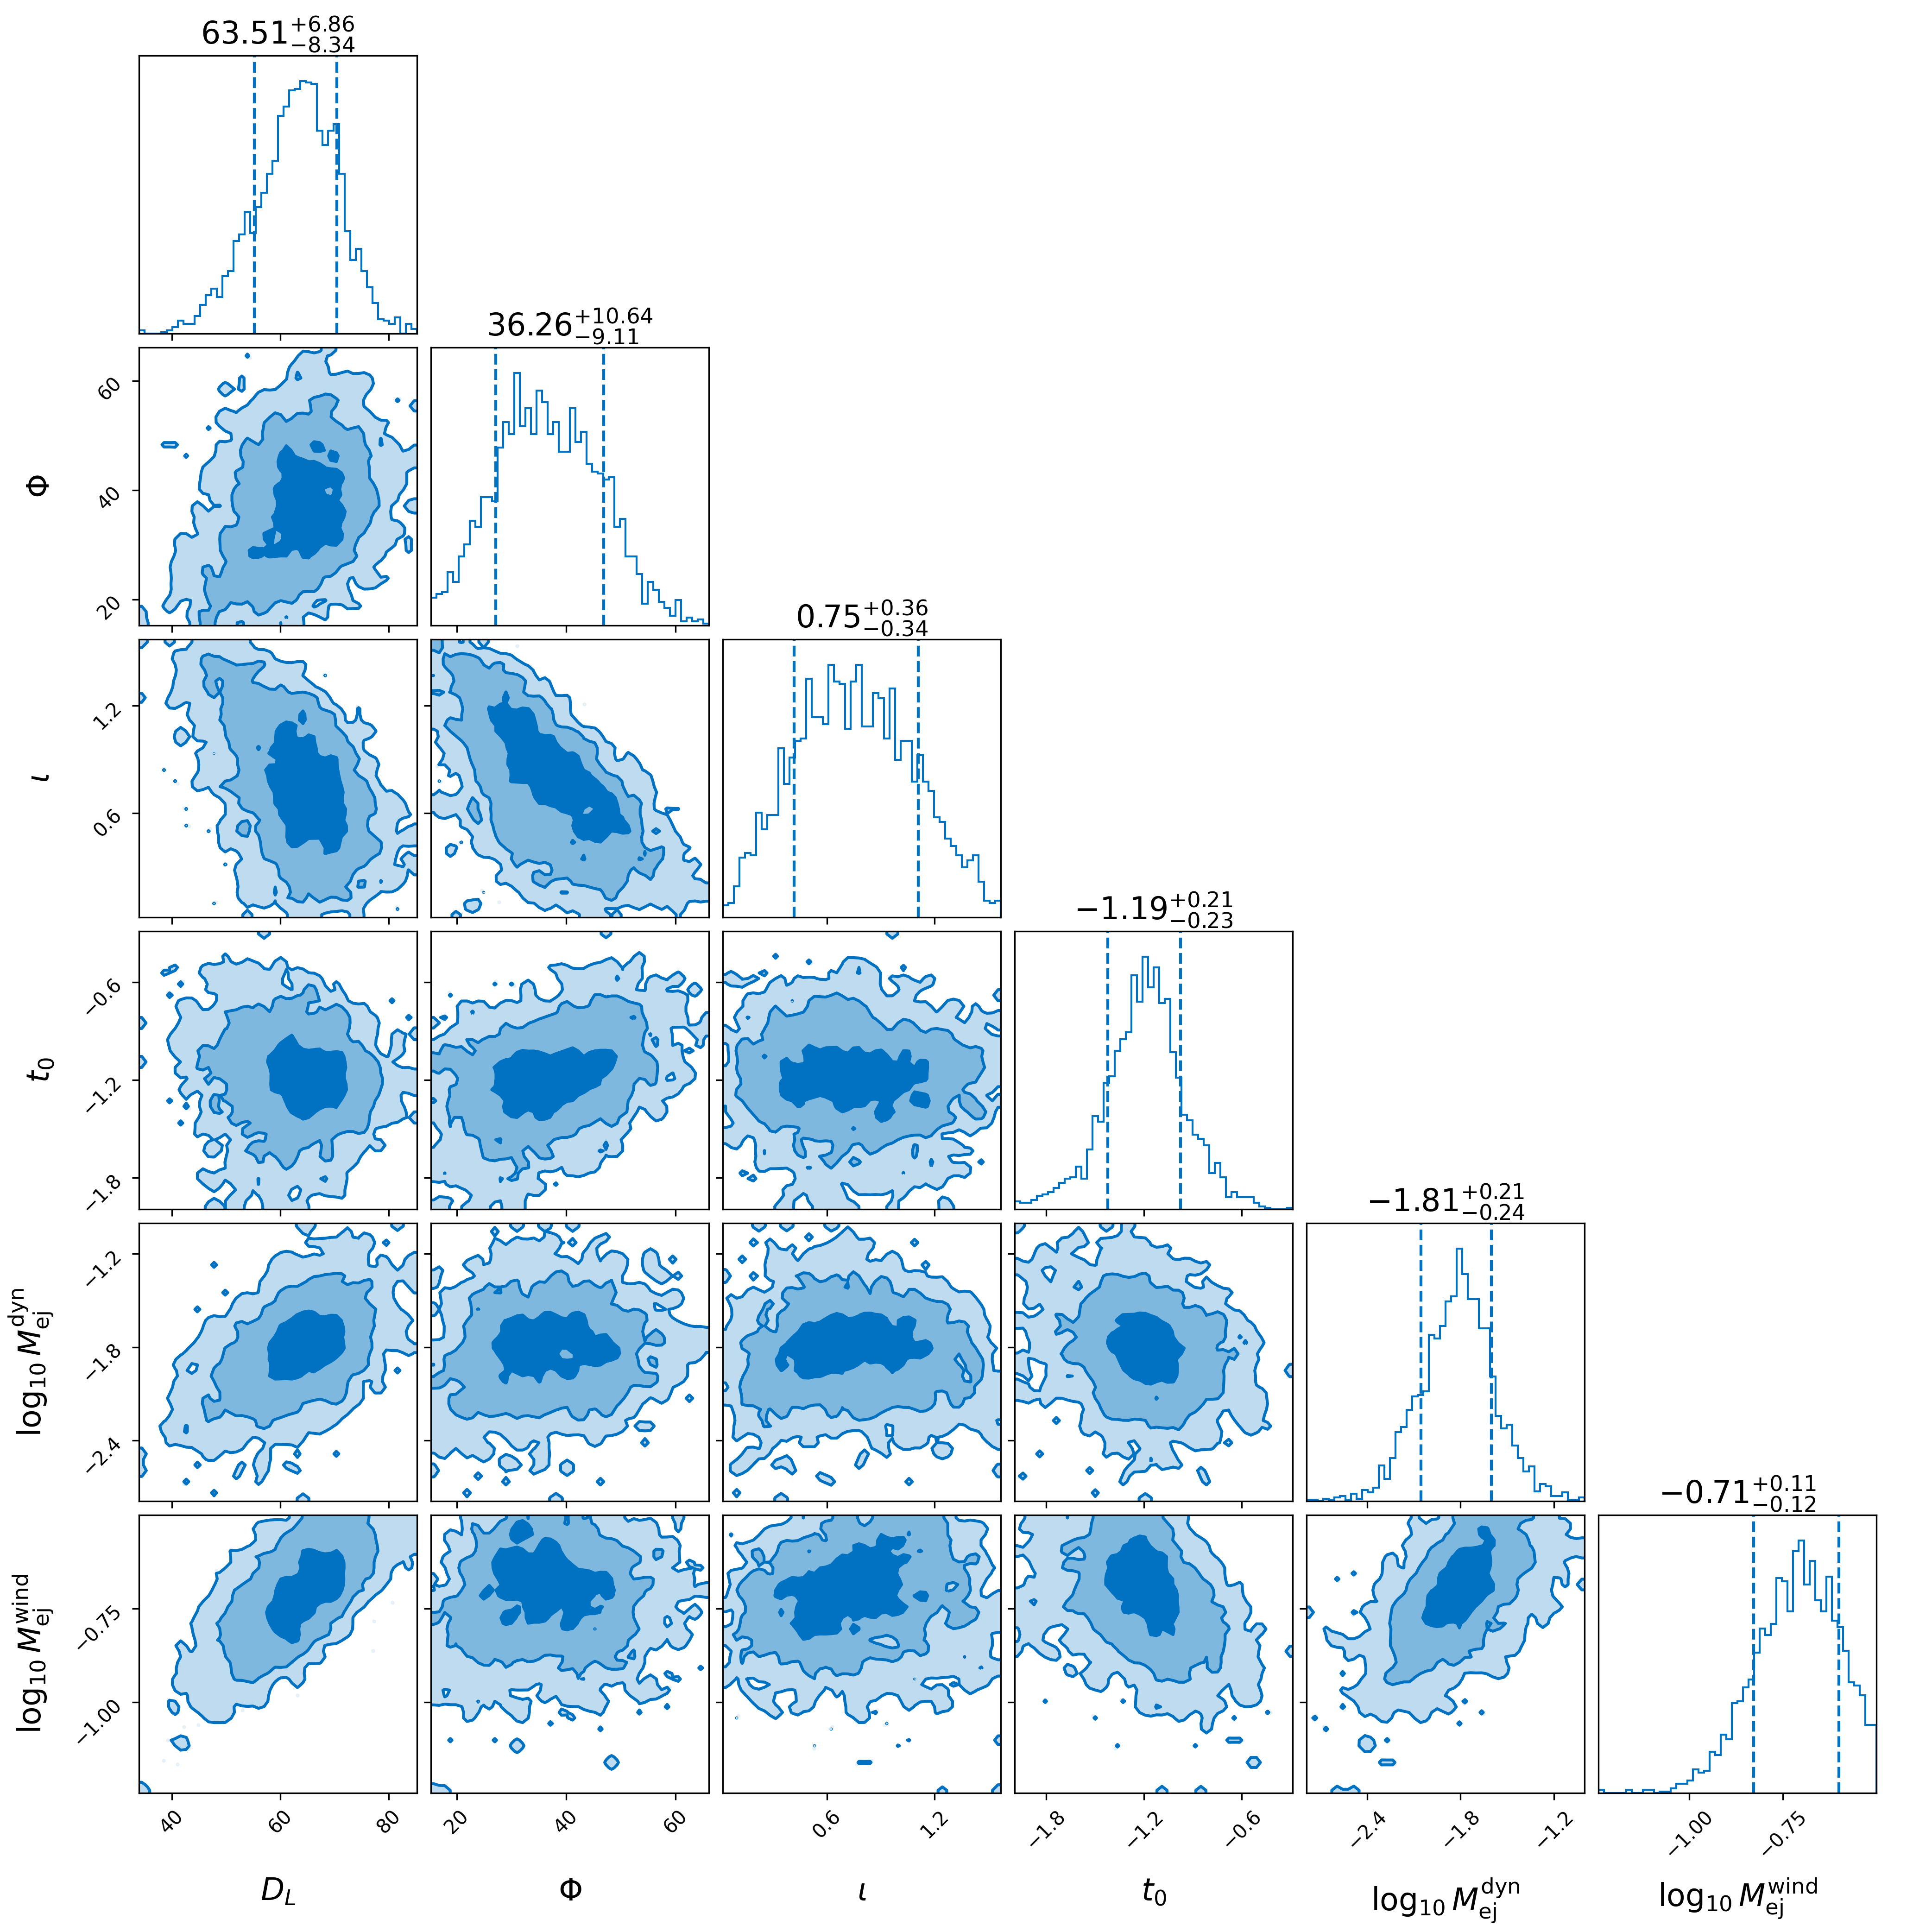

In [37]:
from IPython.display import Image
Image("./outdir/AT2017gfo_Bu2019lm_corner.png", width=700, height=700)

## **4.2) Joint Multi-Messenger Inference**

The joint parameter estimation in NMMA combins both, GW and EM likelihoods. The joint likelihood $\mathcal{L}$ is given by

\begin{equation}
    \mathcal{L}(\vec{\theta}) = \mathcal{L}_{\rm GW}(\vec{\theta}_{\rm GW}) \times \mathcal{L}_{\rm EM}(\vec{\theta}_{\rm EM}),
\end{equation}

where $\vec{\theta} = \{\vec{\theta}_{\rm GW}, \vec{\theta}_{\rm EM}\}$. 

**What can we run in NMMA?**

1) combination of GW + EM models (GRB + KN) <br>
2) combination of EM models (GRB + KN or GRB + SN or others)

An examplary result for a full joint Bayesian inference for the well-observed binary neutron star merger from 2017 is shown below. The joint parameter estimation combined information from messengers: 
- GW170817
- GRB170817A
- AT2017gfo

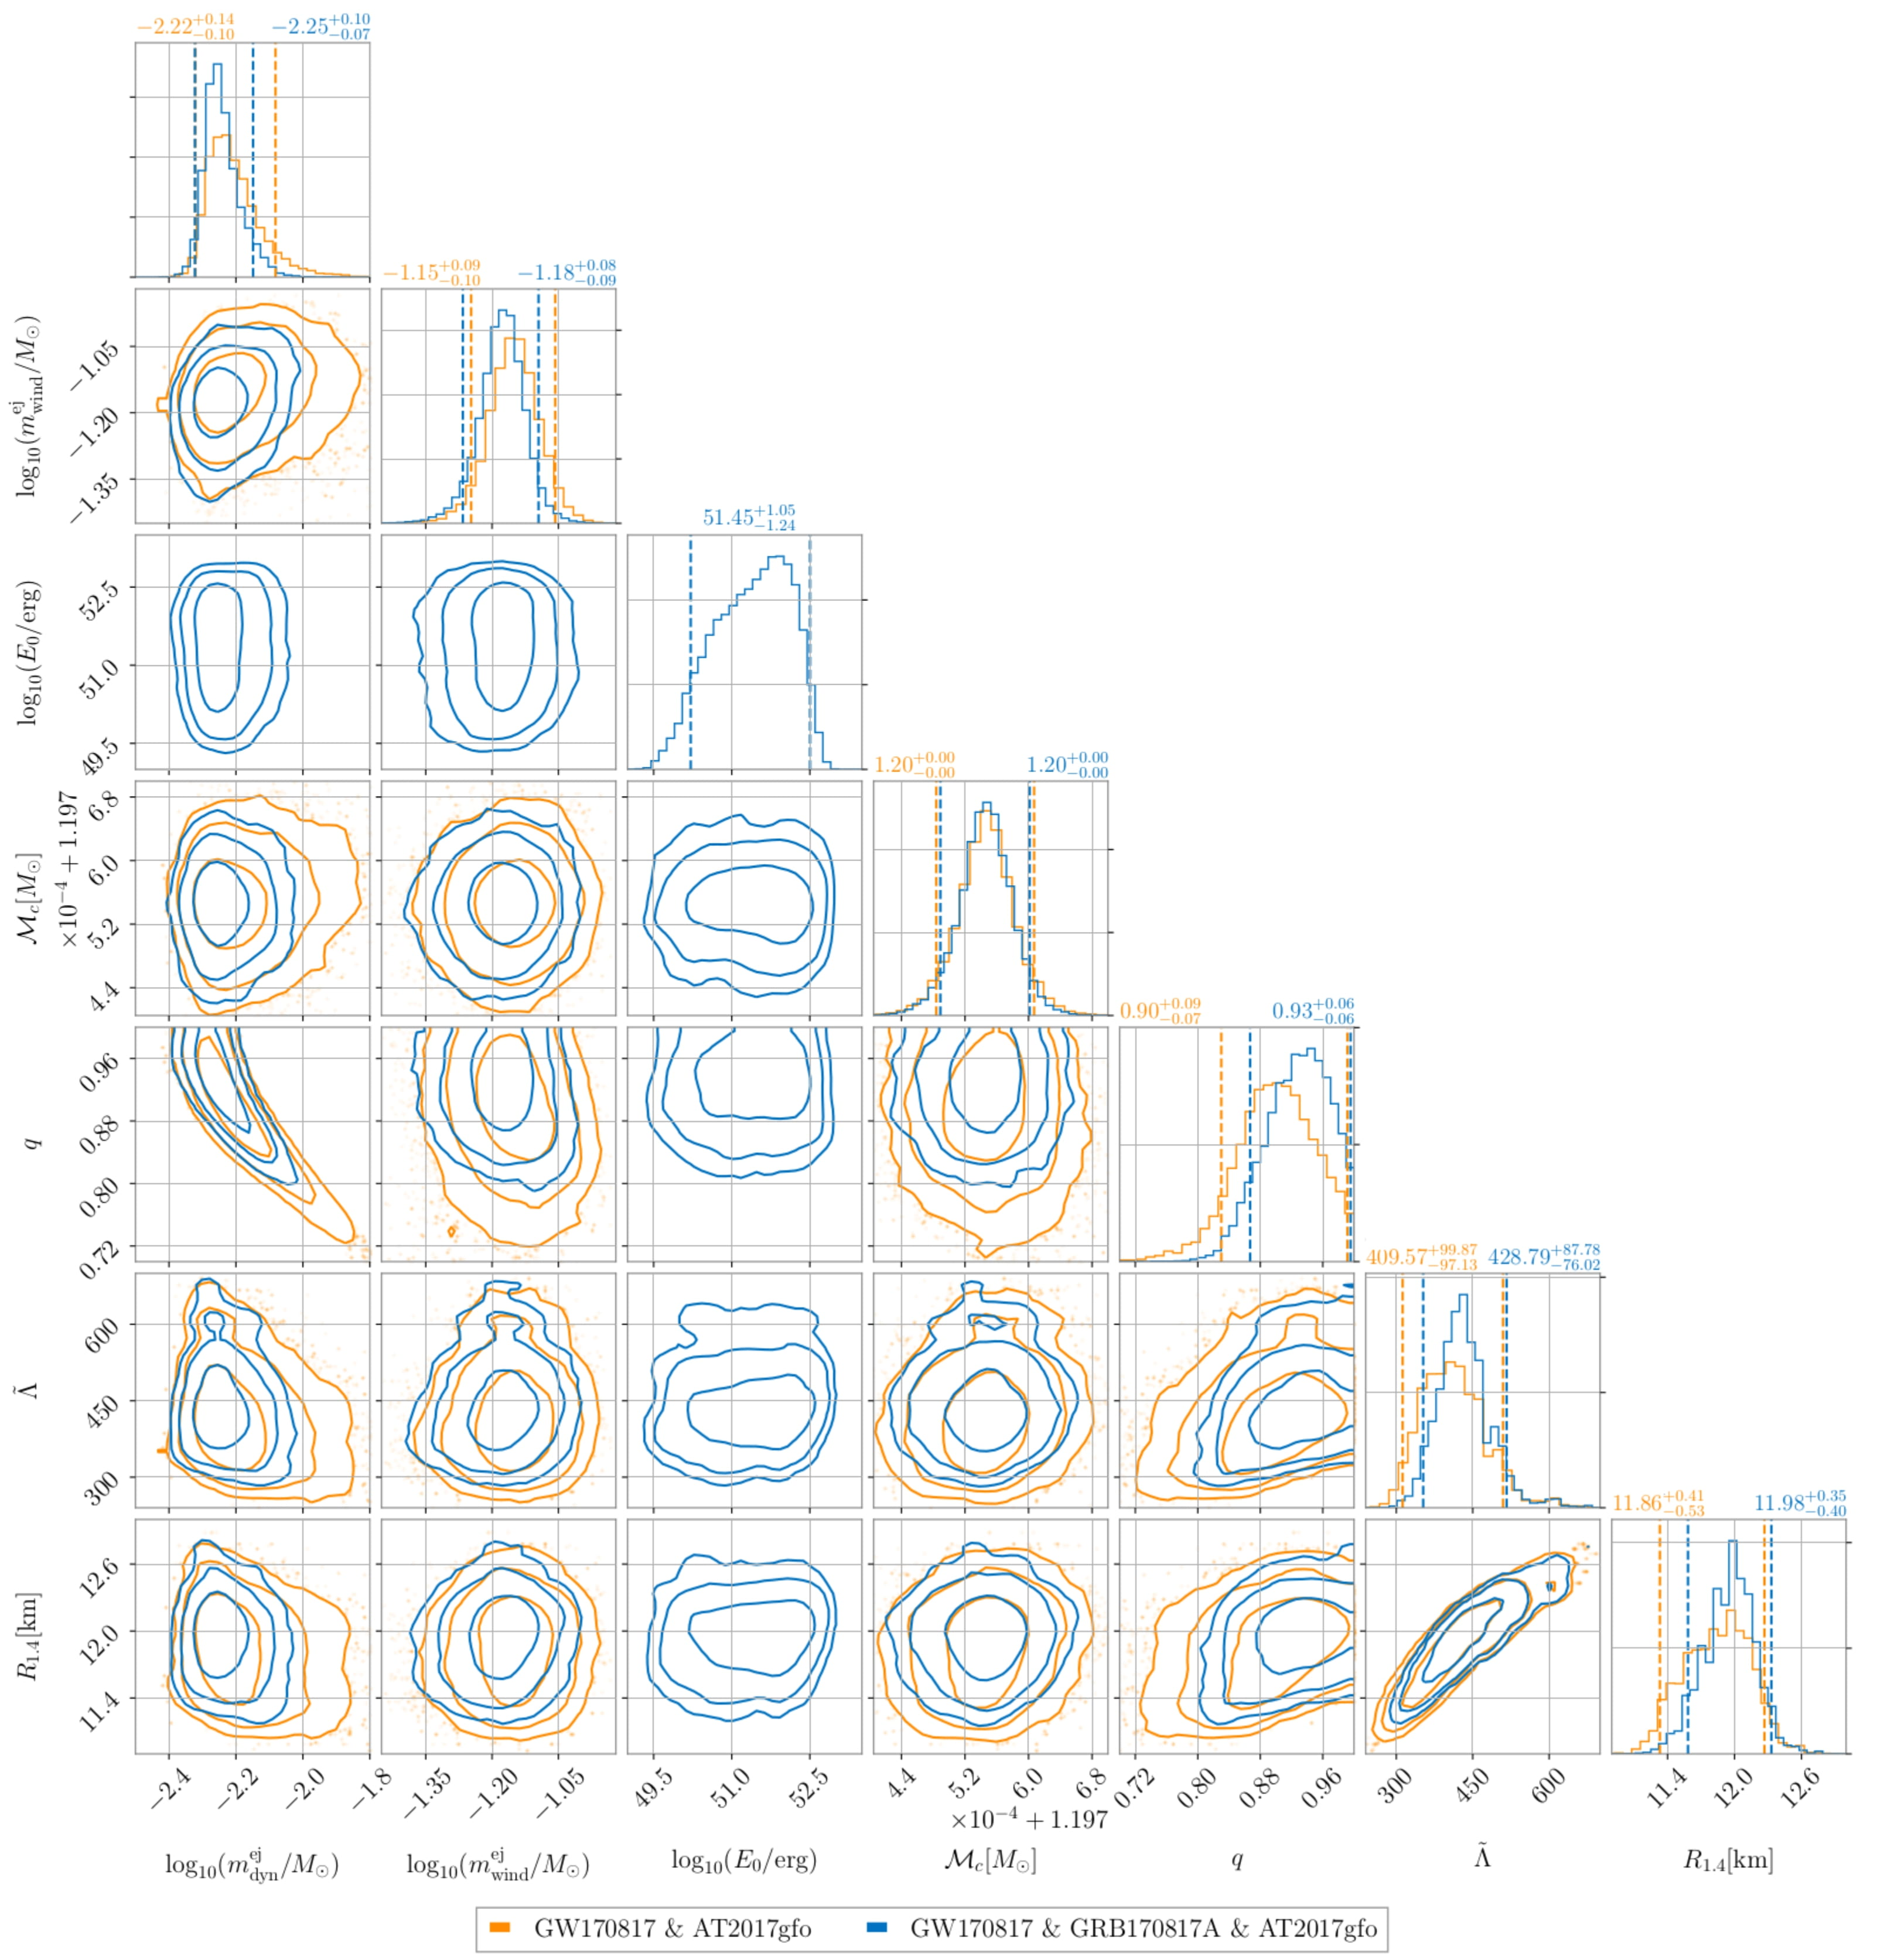

In [4]:
Image("figures/corner_comp_GWGRBKN_GWKN.jpg", width=1000, height=1000)

***Plot:*** Corner plot for the mass of the dynamic ejecta $m^{ej}_{dyn}$, the mass of the disk wind ejecta $m_{wind}$, $log_{10}$ of the GRB jet on-axis isotropic energy $log_{10} (E_0)$, the source-frame chirp mass $\mathcal{M}_c$, the mass ratio $q$, the mass-weighted tidal deformability $\tilde{Λ}$ and the radius of a 1.4 solar mass neutron star $R_{1.4} at 68%, 95% and
99% confidence. For the 1D posterior probability distributions, we mark the median (solid lines) and the 90% confidence interval (dashed lines) and report these above each panel. We show results that are based on the simultaneous analysis of GW170817&AT2017gfo (orange) and of GW170817&AT2017gfo&GRB170817A
(blue). [Pang et al., 2022]

### **4.2.1) Joint Inference for observed GW + GRB + KN signals**


***A typical joint inference on GW+GRB+KN signals requires:***
- a prior file (e.g., see [here](https://github.com/nuclear-multimessenger-astronomy/nmma/blob/main/example_files/prior/GW170817_AT2017gfo_GRB170817A.prior))
- data or injection file
- optional: EOS folder (including EOSs) and EOS weighting file


***Main Command:***
- `nmma_generation config.ini`
- `nmma_analysis outdir/data/label_data_dump.pickle`


***Command arguments:***
- `--nlive` - number of live points to explore the likelihood landscape
- `--maxmcmc` - maximum number of random walks 
- `--nact` - number of auto-correlation times to use before accepting a point
- `--label` - name of inference run
- `--outdir` - output directory name
- `--sampling-seed` - Random seed for sampling
- `--check-point-deltaT` - time interval for saving checkpoints



### **4.2.2) Joint Inference for observed EM signals (e.g. GRB + KN)**

*Run in terminal prompt*

***Task:***
- Go to this webpage: https://enlil.gw.physik.uni-potsdam.de/dokuwiki/doku.php?id=lc_comb_inference
- Try to run the combined inference for the example BNS case!
- Make sure to check your available computational resources! (adapt `mpiexec -np xx` to xx available cores)

## **4.3) ZTF Data Inference in O4**

Yesterday and today, you have discussed the example of GW170817, which was very well observed via multiple messengers. However, this example is fairly exceptional; most other potential candidates will not be nearly as well observed by ZTF. In O4, it will be challenging to positively identify some potential companions to GW observed by LIGO with the help of the ZTF data because ZTF will be distance limited in many cases.

In addition to this, some targets will only have a handful of data points to be used for parameter estimation. One of our current projects is performing automated fitting of ZTF data using the MSI cluster at UMN. These are fits of objects observed a handful of times being run with a relatively low number of live points, with each target being fit to multiple models. The repository for this work can be found [here](https://github.com/tylerbarna/nmma_fitter) and an example of one of the fits is shown below.

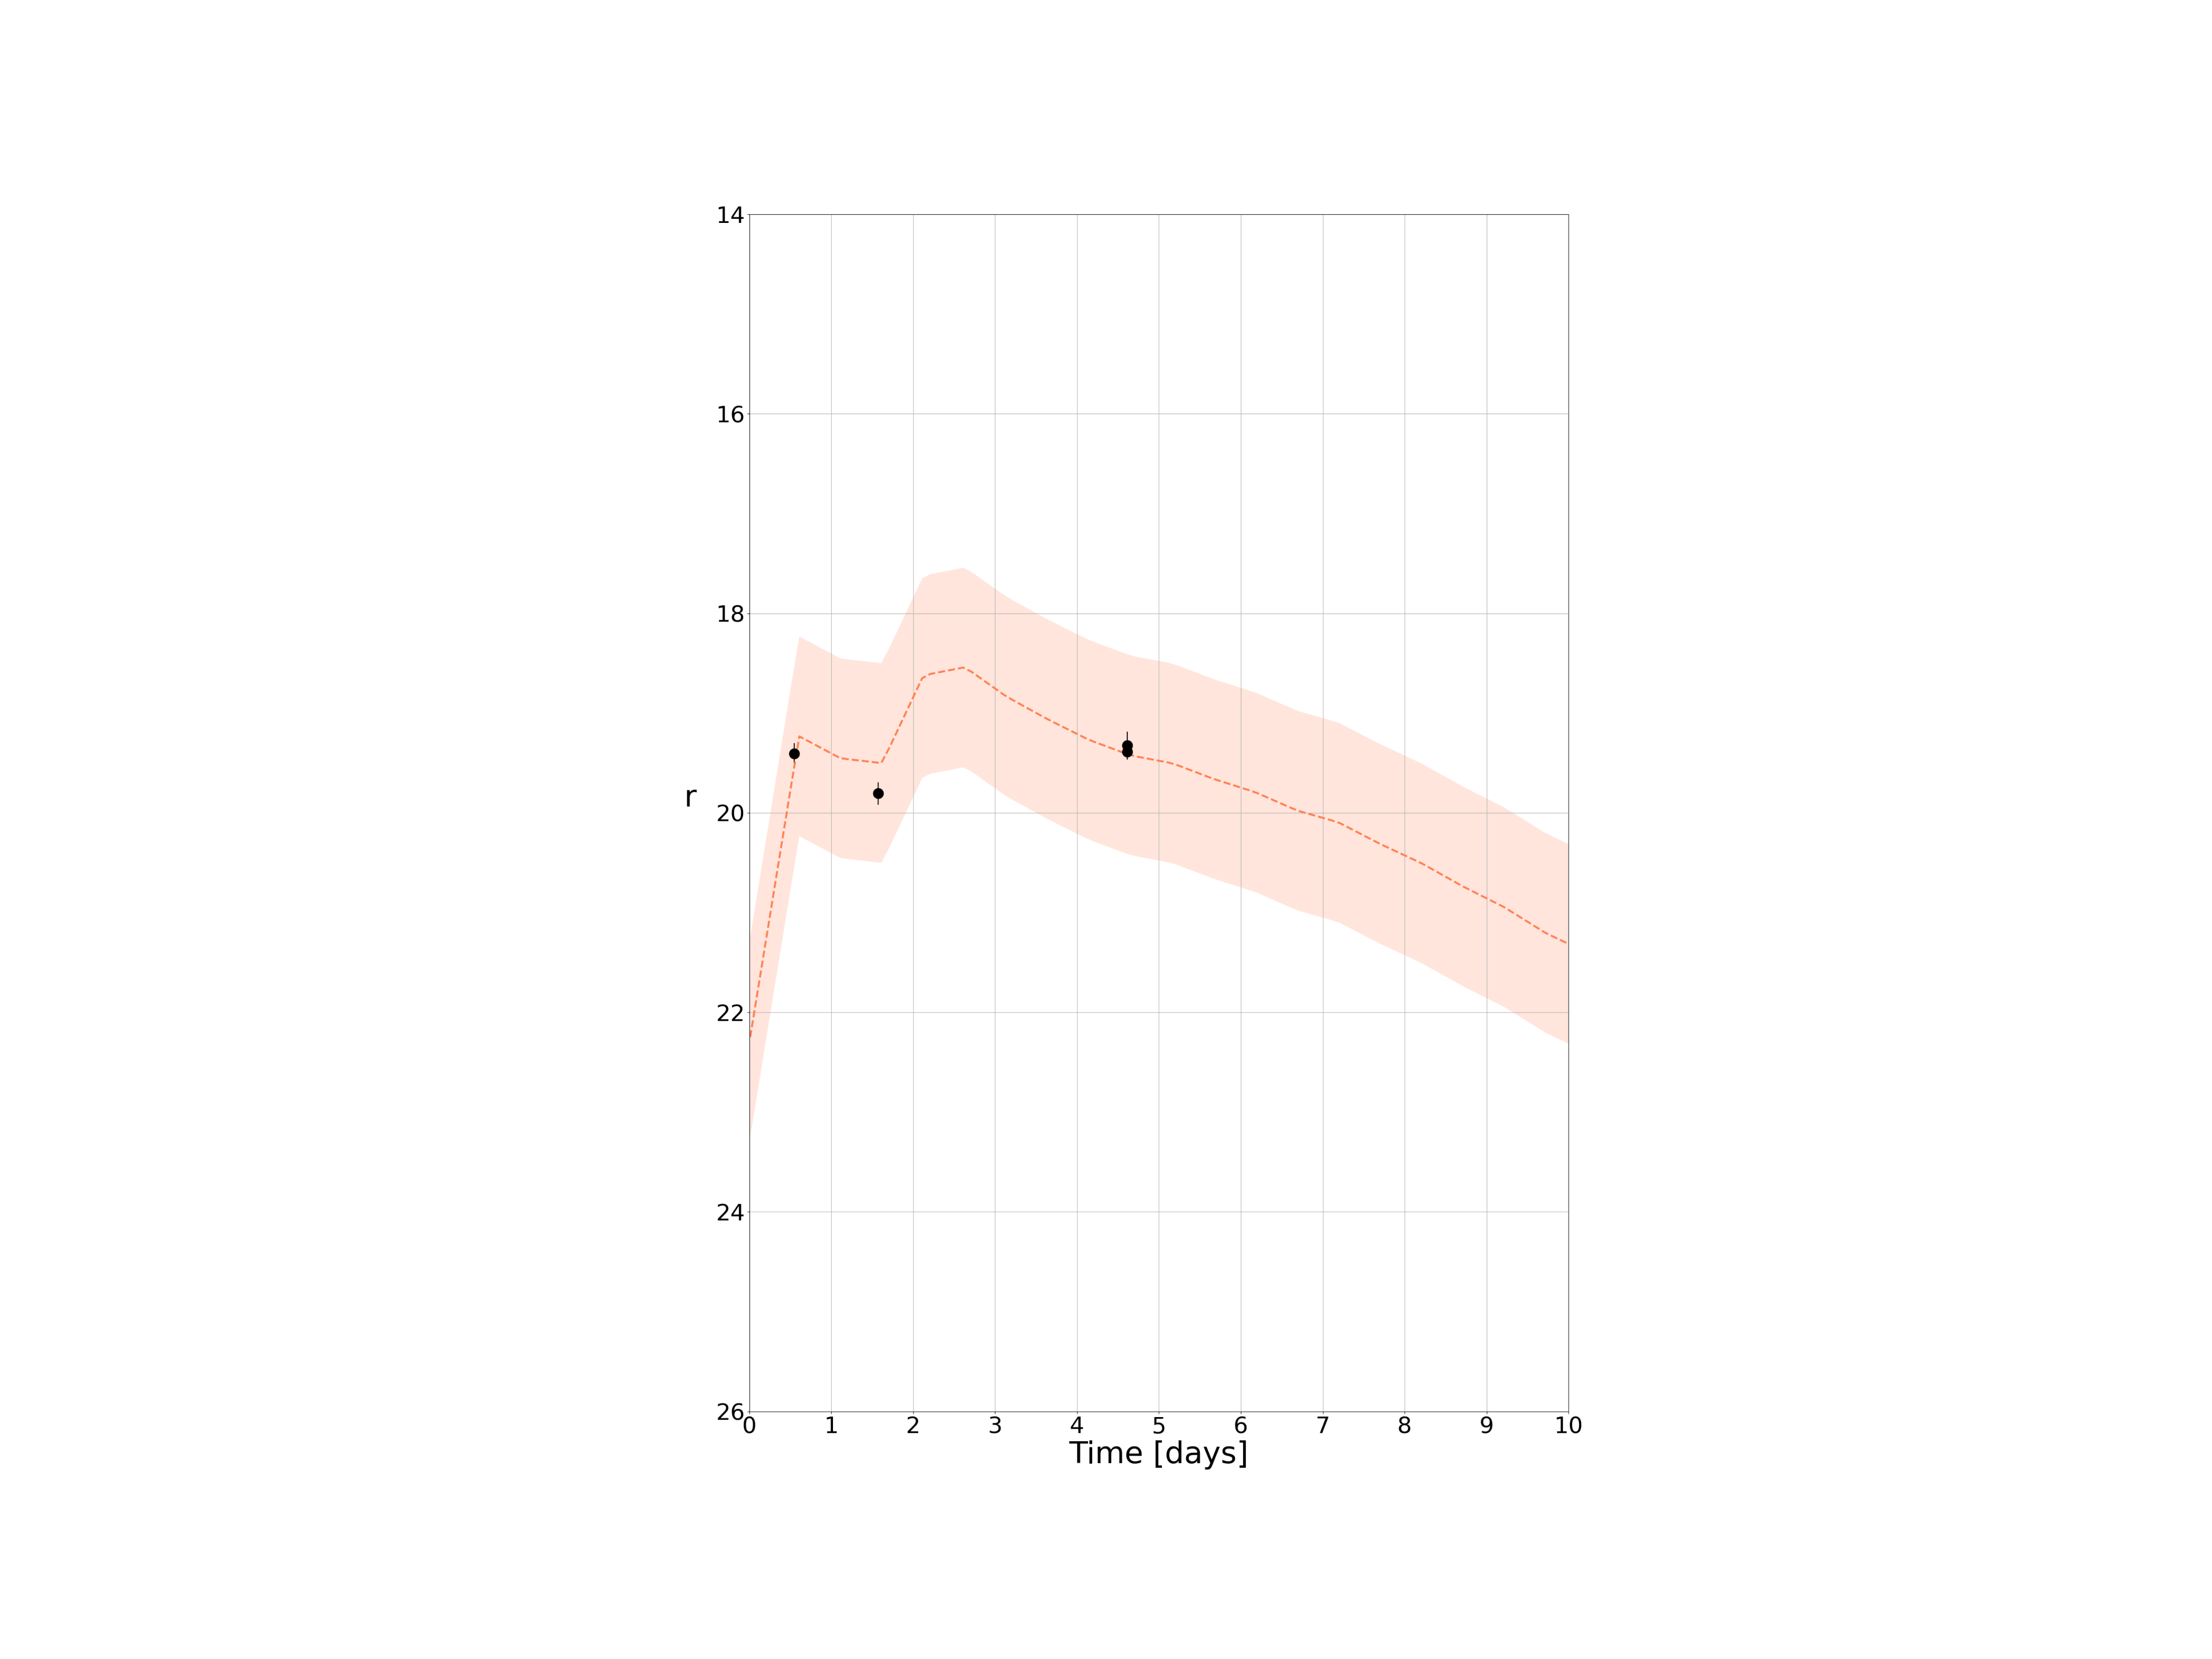

In [10]:
Image("figures/Bu2019lmlightcurve_ZTF22aaujrib.png", width=1000, height=500)

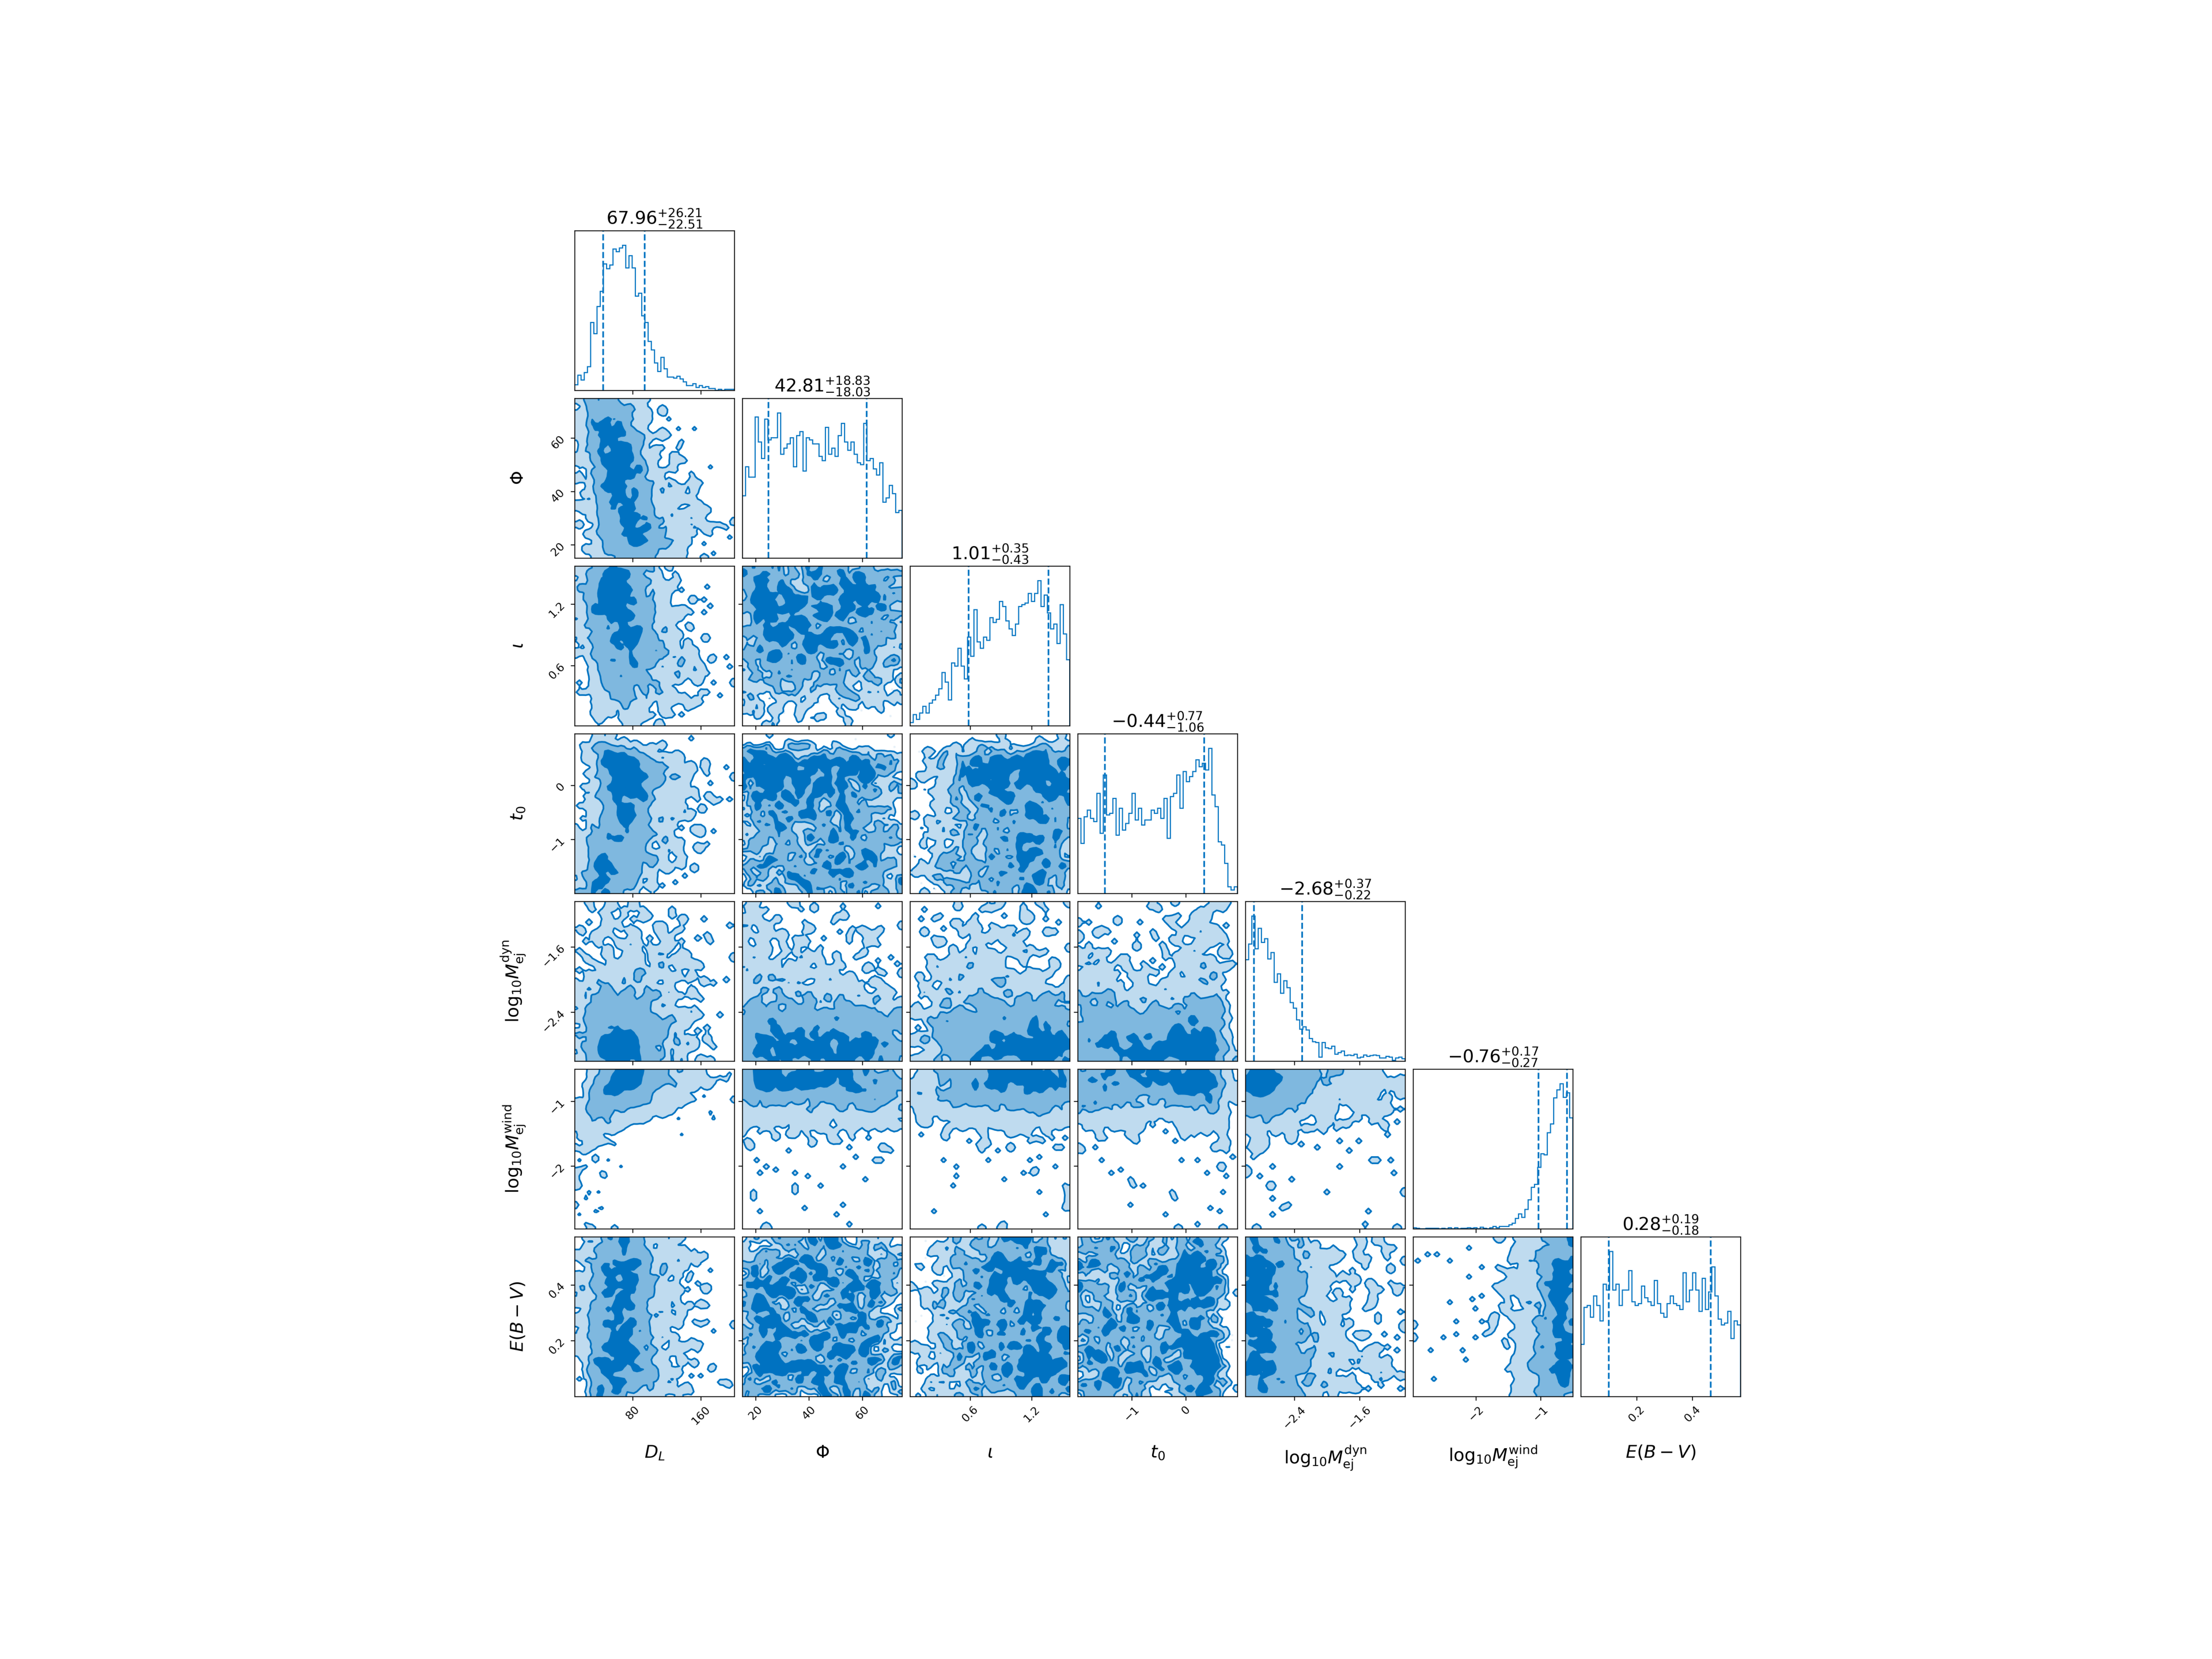

In [8]:
Image("figures/Bu2019lmcorner_ZTF22aaujrib.png", width=1000, height=1000)

The goal of this is not to necessarily determine a "good" fit to a model. Rather, the idea is to use limited computing time to quickly determine which models fit a target the best and potentially use this to inform follow-up observations.

An ongoing project for the nmma pipeline is to add functionality so a dataset can be generated that places arbitrary additional points at some time along an existing generated lightcurve. This would form the basis for a training data set from which we would hopefully be able to determine a model to ascertain what objects would benefit the most from additional observations.

***Task:***

- Run light_curve_analysis on a ZTF candidate using data within `example_data/candidate_data`.
- Note that depending on which candidate you choose, there may not have been a detection in all of the ZTF bands (`ztfg`, `ztfr`, `ztfi`).
- You will need to provide a reasonable `trigger_time` in MJD based on the time of first detection for your chosen candidate.

The below example uses ZTF21abdpqpq and a trigger_time of 59361.0 MJD:

*Run in terminal prompt*

In [ ]:
#mpiexec -np 8 light_curve_analysis --model Bu2019lm --interpolation_type tensorflow --svd-path ./svdmodels --outdir ./outdir --label ZTF21abdpqpq --data ./example_files/candidate_data/ZTF21abdpqpq.dat --prior ./priors/Bu2019lm.prior --tmin 0 --tmax 14 --dt 0.1 --error-budget 1 --nlive 512 --Ebv-max 0 --filters ztfg,ztfr,ztfi --trigger-time 59361.0 --plot

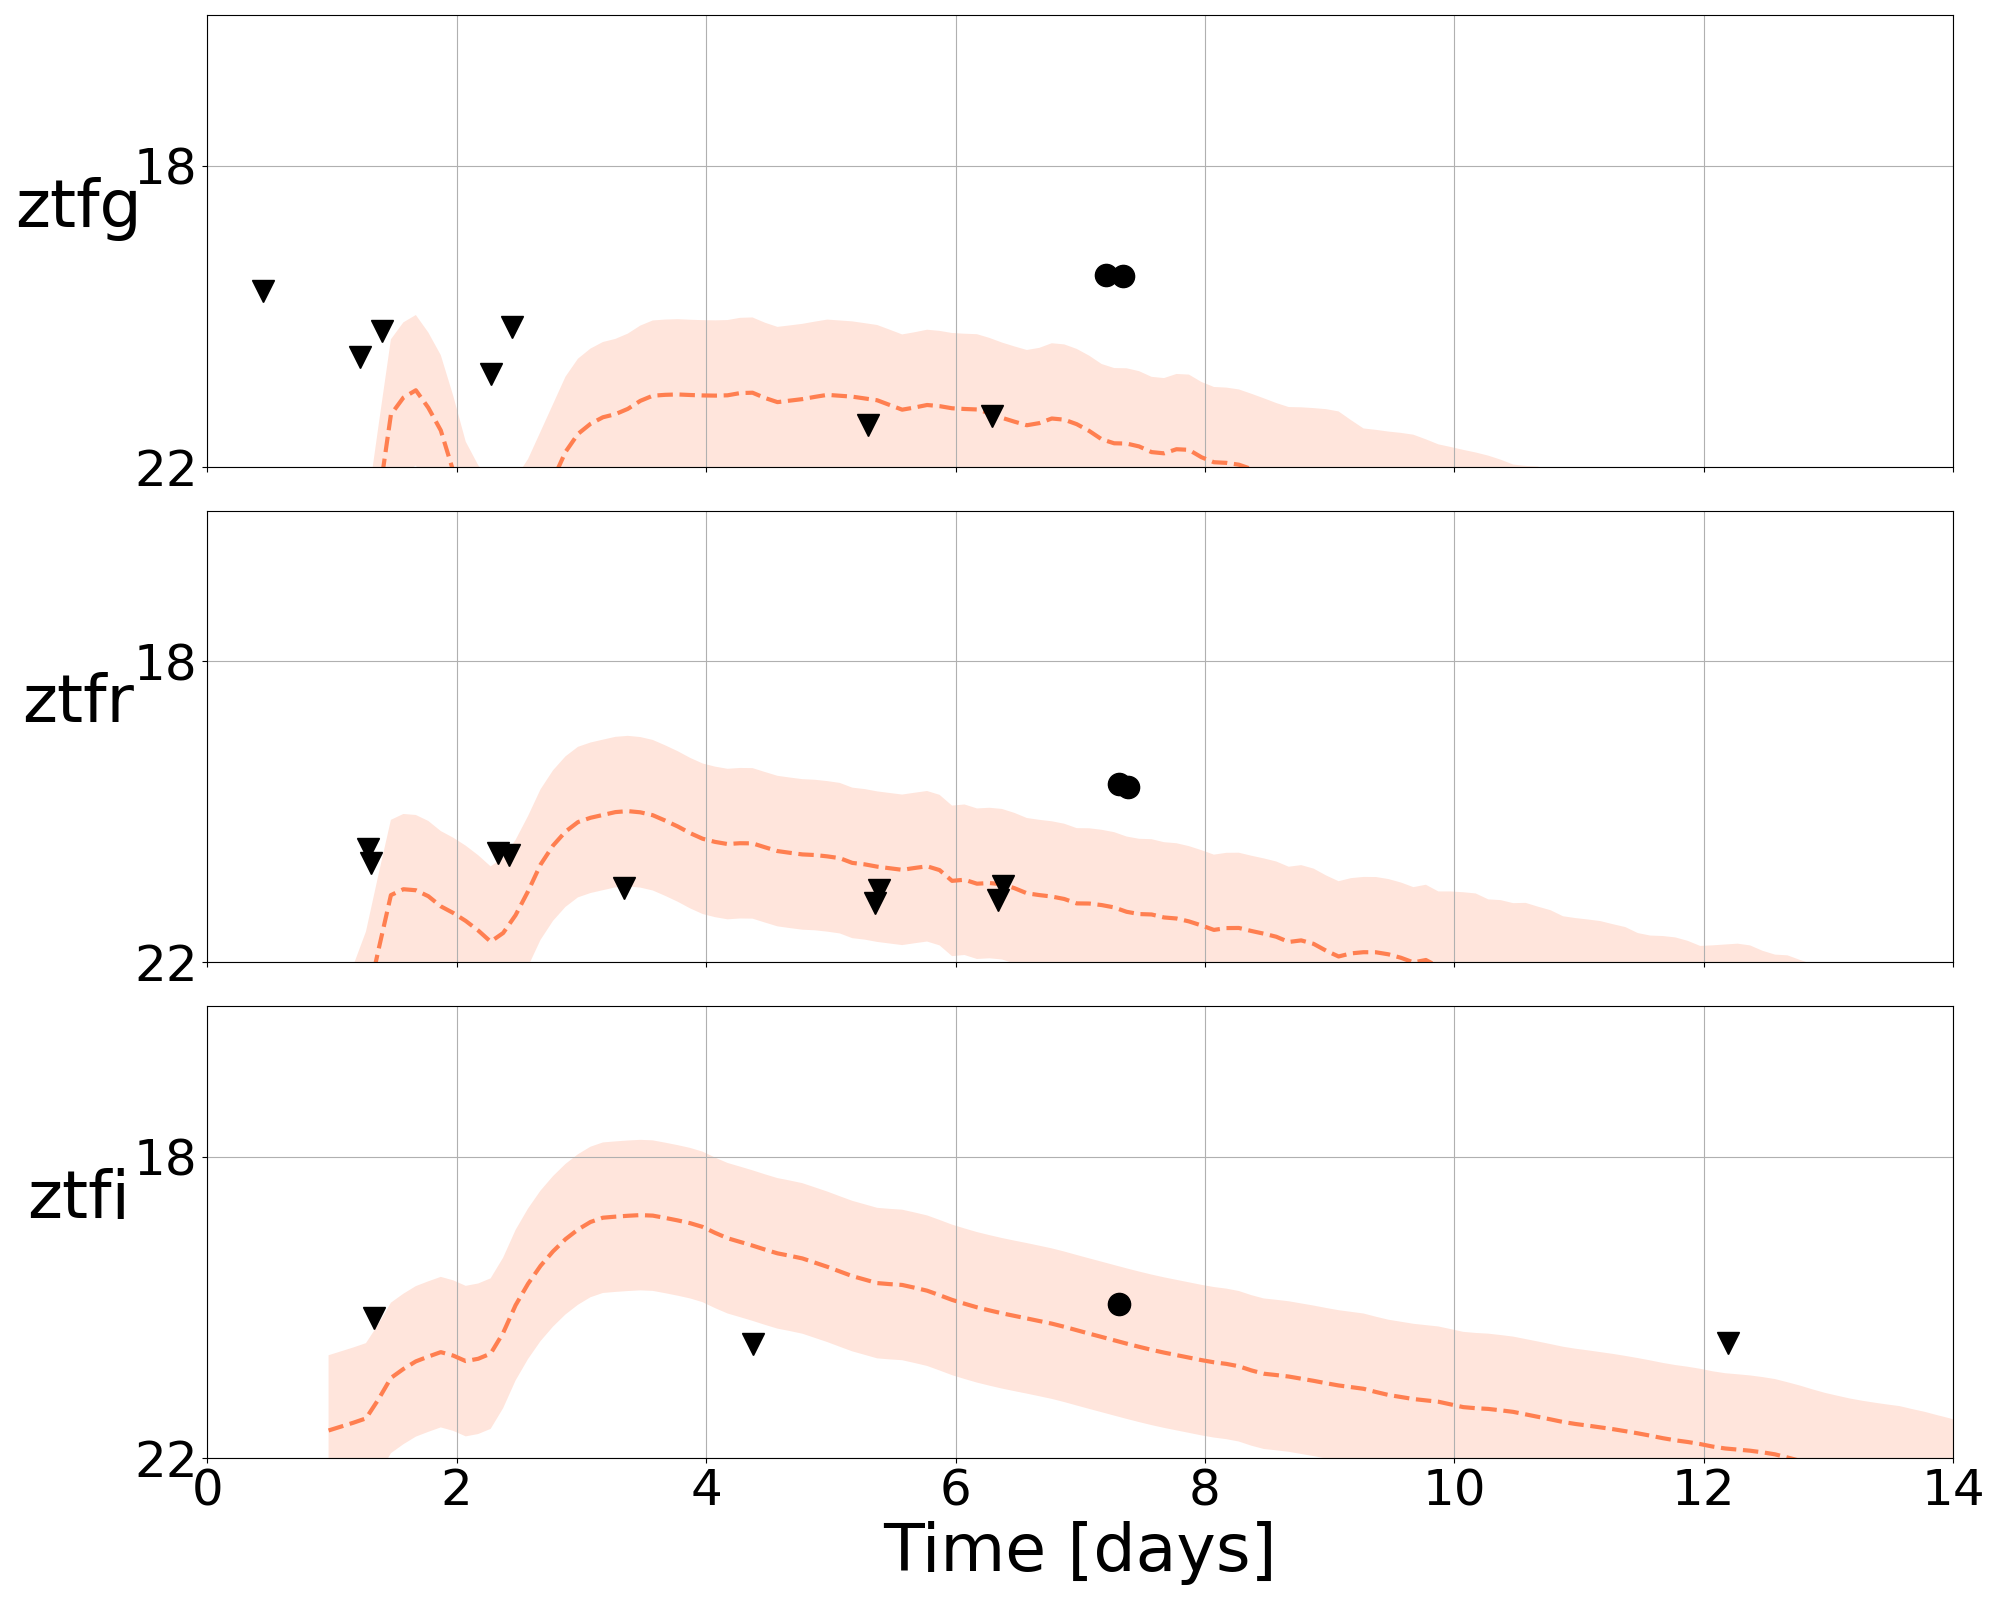

In [43]:
Image("./outdir/ZTF21abdpqpq_lightcurves.png", width=800, height=800)

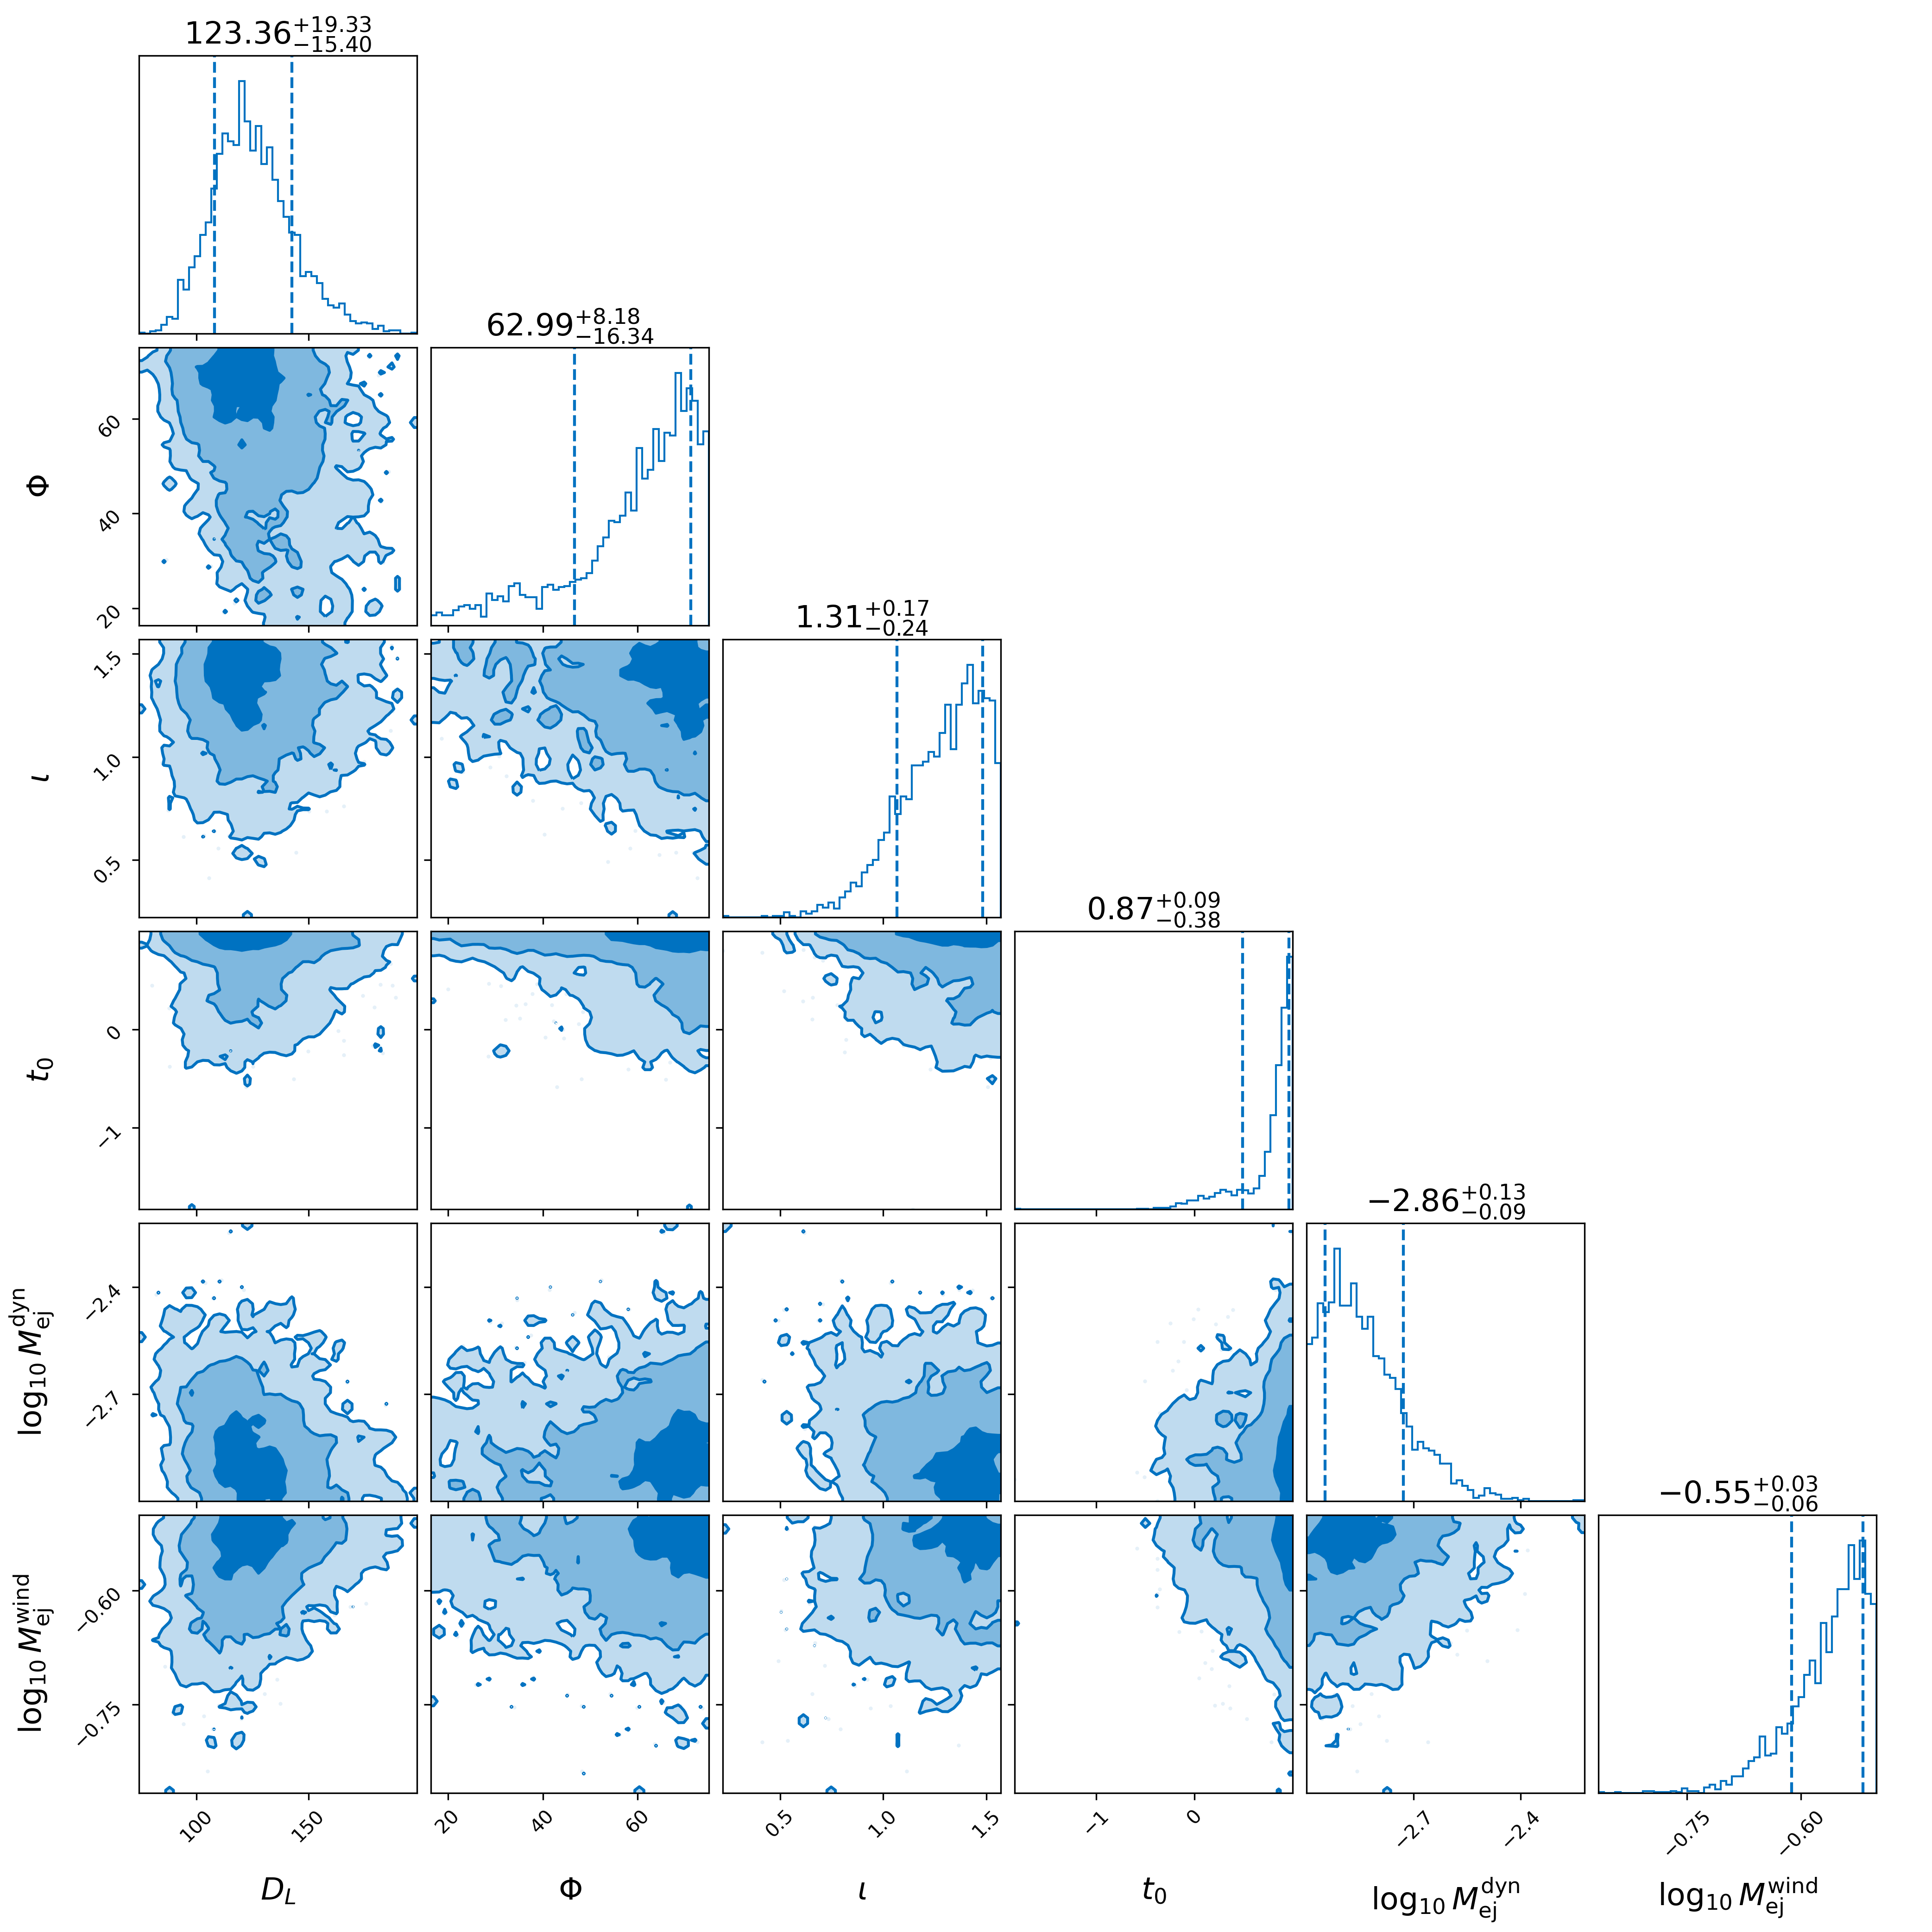

In [42]:
Image("./outdir/ZTF21abdpqpq_corner.png", width=800, height=800)